> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (IMDB Movie Dataset!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>

> The IMDB Movie Data is a dataset that contains about ~10,000 data points which was cleaned from the [kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)

> **NB**: In the dataset, the final two columns ending with `_adj` show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


> With data on the overview, cast, directors, budget, and revenues of several thousand films, the dataset delves into chances to predict which films will be highly rated, whether or not they are a commercial success.

On a close look at the data (features, origin, and purpose), we can ask the following questions about the data:
- Which genres are most popular from year to year?
- What features are associated with movies that have high revenue?
- Are movies with high revenue synonymous with high votes?
- Which director directed the most popular movie each year?
- Which year has the highest revenue?
- Which director has directed the most movies?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import style
from tqdm.notebook import tqdm
from sklearn import preprocessing
from IPython.display import display

style.use("ggplot")
warnings.filterwarnings("ignore")


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")

In [3]:
# Taking a first look on the data
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

In [6]:
# Check columns with null values and the count of the null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> By looking the output of the cell above we can see that the columns: `imdb_id`, `cast`, `homepage`, `director`, `tagline`, `keywords`, `overview`, and `production_companies` all have null values. However, the column: `homepage` has too many null values so we are going to drop it along with the`tagline` which has almost $25\%$ of its values null.

In [7]:
# drop homepage and tagline columns
df.drop(["homepage", "tagline"], 1, inplace=True)

> Inspecting the uniqueness of some columns to check relevance

In [8]:
# function to help our code cleaner
def get_unique_diff(col_serie):
    '''
        Descr: This function helps to calculate the difference
               between the unique and total non null values of
               a given column.
        @args: col_serie >> type: pandas.core.series.Series
        return: None
    '''
    valid_ = col_serie.notnull().sum()
    unique_ = col_serie.nunique()
    print(f"Column Name: {col_serie.name}", "\nSize: ", valid_, "\tUnique Values Count: ", unique_,
          "\tDifference: ", valid_ - unique_)

In [9]:
# Keywords Column
get_unique_diff(df.keywords)

Column Name: keywords 
Size:  9373 	Unique Values Count:  8804 	Difference:  569


In [10]:
# Overview Column
get_unique_diff(df.overview)

Column Name: overview 
Size:  10862 	Unique Values Count:  10847 	Difference:  15


In [11]:
# Original Title Column
get_unique_diff(df.original_title)

Column Name: original_title 
Size:  10866 	Unique Values Count:  10571 	Difference:  295


> The columns: `overview` and `keywords` will be dropped alongside the `imdb_id` colulmn because they seem not to have much relevance or usefulness in the dataset

In [12]:
# dropping columns
df.drop(["overview", "keywords", "imdb_id"], 1, inplace=True)

In [13]:
# check the data size to ensure changes
df.shape

(10866, 16)

> Inspecting the rows of the dataframe to check for duplicates and rows with more `NaN` values

In [14]:
# Check for duplicates
df.duplicated().sum()

1

> Since we have only one row showing duplicated, let's get the duplicated row to ensure it is safe to drop

In [15]:
dupes = df.duplicated()
df[dupes]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [16]:
df.query("id == 42194")

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


> Since we can see the row is actually duplicated so it is safe to drop

In [17]:
df = df.drop_duplicates()
df.shape

(10865, 16)

In [18]:
# check for remaining columns with null values
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [19]:
df.dropna(0, inplace=True)
print(df.shape)
df.isnull().sum()

(9772, 16)


id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

> Now, lets proceed to make the data types contained in each column to be in the type that we can work with. For example, the `release_date` column is obvious a date, but it is in `object` type. So we will convert it to `Date` format and the others to their respective correct types

In [20]:
# Convert release_date column from object(string) to date
df.release_date =  pd.to_datetime(df.release_date, infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9772 non-null   int64         
 1   popularity            9772 non-null   float64       
 2   budget                9772 non-null   int64         
 3   revenue               9772 non-null   int64         
 4   original_title        9772 non-null   object        
 5   cast                  9772 non-null   object        
 6   director              9772 non-null   object        
 7   runtime               9772 non-null   int64         
 8   genres                9772 non-null   object        
 9   production_companies  9772 non-null   object        
 10  release_date          9772 non-null   datetime64[ns]
 11  vote_count            9772 non-null   int64         
 12  vote_average          9772 non-null   float64       
 13  release_year     

In [21]:
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned our data, we're ready to move on to exploration. We are going to compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. It is recommended that we be systematic with our approach so on that note, we are going to look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which genres are most popular from year to year?)

> Here, we are going to get the most popular `genres` in each year. To achieve this, we are going to follow these steps:
- Group the data by year
- Select the `max()` values
- Get the required columns: `genres` and `popularity`

In [22]:
year_grouped = df.groupby("release_year").max()
year_grouped.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,,,,,,,
1960,43040,2.610362,12000000,60000000,Village of the Damned,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,Wolf Rilla,208,Thriller|Music|Comedy|Crime,Woodfall Film Productions,2060-12-23,1180,8.0,8.847561e+07,4.423780e+08
1961,43020,2.631987,6000000,215880014,West Side Story,Vincent Price|John Kerr|Barbara Steele|Luana A...,Yuri Chulyukin,186,Western|Action|Adventure,Warner Bros.|Newton Productions|NBI Productions,2061-12-25,913,7.5,4.376917e+07,1.574815e+09
1962,45267,3.170651,15000000,70000000,What Ever Happened to Baby Jane?,Vincent Price|Peter Lorre|Basil Rathbone|Debra...,Vittorio De Sica|Federico Fellini|Luchino Visc...,216,Western|Action|Adventure|Drama,Woodfall Film Productions|British Lion-Columbi...,2062-12-26,560,7.7,1.081267e+08,5.045914e+08


In [23]:
pop_genres = year_grouped.loc[:, ["genres", "popularity"]]
pop_genres

,genres,popularity
release_year,,
1960,Thriller|Music|Comedy|Crime,2.610362
1961,Western|Action|Adventure,2.631987
1962,Western|Action|Adventure|Drama,3.170651
1963,Romance|Comedy|Drama,2.508235
1964,Western|Action,3.153791
1965,War|Drama|Romance,1.910465
1966,Western,1.227582
1967,Western,2.550704
1968,Western,3.309196


> The output above clearly shows the genre groups that the most popular from year to year along with their popularity score. We can see that groups with `Western` had the highest popularity streak between `1966` to `1976`.

### Research Question 2  (What features are associated with movies that have high revenue?)

> Here, we are going select some columns, get the mean of each of the columns and check if movies that fall on the upper boundary have a higher revenues.

> To start, we are going to select columns: `popularity`, `budget`, and `vote_average`. We selected these columns because they seemed to be among the top column with relevance to the dataset

In [24]:
# Let's take a look at the current state of the data
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


#### 1.) Do movies with high popularity have high revenues?

In [25]:
# First, let's get the median of the popularity
median_pop = df.popularity.median()
median_pop

0.41976199999999997

In [26]:
# select samples with popularity less than the median
low_pop = df.query(f"popularity < {median_pop}")

# select samples with popularity greater than or equal to the median
high_pop = df.query(f"popularity >= {median_pop}")

# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_pop.revenue.count() + high_pop.revenue.count() # should be True

True

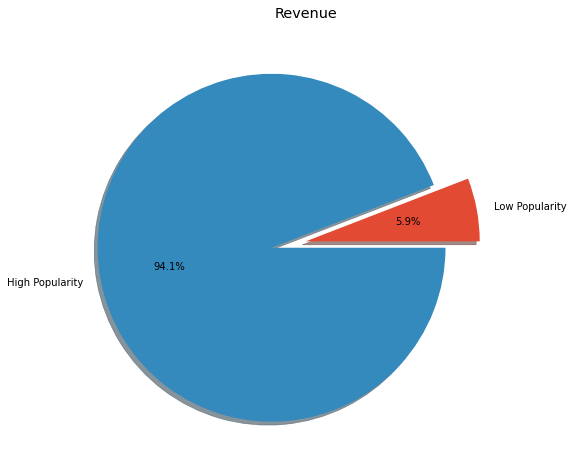

In [27]:
# get mean revenue for the low and high popularity groups
mean_low_pop = low_pop.revenue.mean()
mean_high_pop = high_pop.revenue.mean()
pie_fig = plt.figure(figsize=(8,8))
plt.pie(
    [mean_low_pop, mean_high_pop], labels=["Low Popularity", "High Popularity"],
    autopct='%2.1f%%', explode=[0,0.2], shadow=True)
plt.title("Revenue");

#### 2.) Do movies with high budget have high revenues?

In [28]:
# Let's get the mean of the budget
median_bud = df.budget.median()
median_bud

200000.0

In [29]:
# select samples with budget less than the median
low_budget = df.query(f"budget < {median_bud}")

# select samples with budget greater than or equal to the median
high_budget = df.query(f"budget >= {median_bud}")

# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_budget.revenue.count() + high_budget.revenue.count() # should be True

True

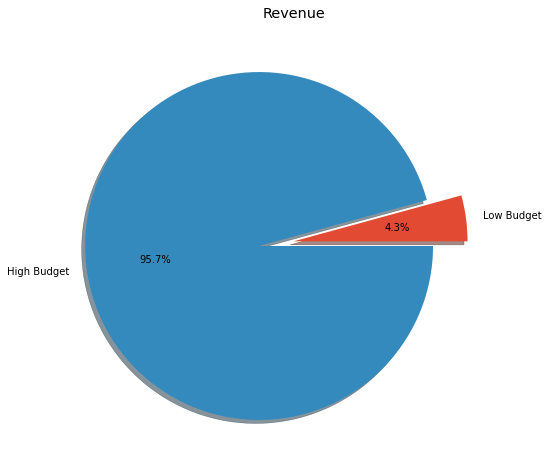

In [30]:
# get mean revenue for the low and high popularity groups
mean_low_budget = low_budget.revenue.mean()
mean_high_budget = high_budget.revenue.mean()
pie_fig = plt.figure(figsize=(8,8))
plt.pie(
    [mean_low_budget, mean_high_budget], labels=["Low Budget", "High Budget"],
    autopct='%2.1f%%', explode=[0,0.2], shadow=True)
plt.title("Revenue");

<a id='high_vote_average'></a>
#### 3.) Do movies with high vote_average have high revenues?

In [31]:
# First, let's get the median of the vote_average
median_vt = df.vote_average.median()
median_vt

6.0

In [32]:
# select samples with vote_average less than the median
low_vt = df.query(f"vote_average < {median_vt}")

# select samples with vote_average greater than or equal to the median
high_vt = df.query(f"vote_average >= {median_vt}")

# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_vt.revenue.count() + high_vt.revenue.count() # should be True

True

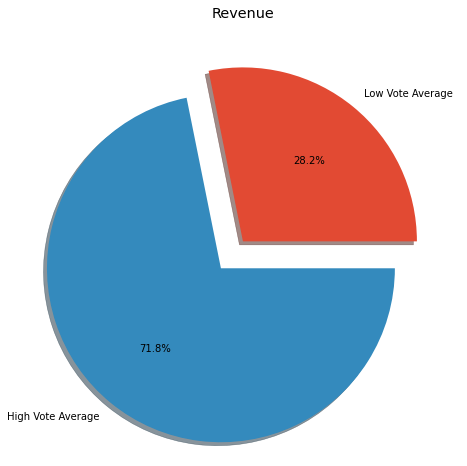

In [33]:
# get mean revenue for the low and high voting_average groups
mean_low_vt = low_vt.revenue.mean()
mean_high_vt = high_vt.revenue.mean()
pie_fig = plt.figure(figsize=(8,8))
plt.pie(
    [mean_low_vt, mean_high_vt], labels=["Low Vote Average", "High Vote Average"],
    autopct='%2.1f%%', explode=[0,0.2], shadow=True)
plt.title("Revenue");

### Research Question 3  (Are movies with high revenue synonymous with high votes?)

> Fortunately, we have already answered this question in the cell above in the third question in **Research Question 2** where we asked about the relationship between high vote average and high revenue.

> Refer to <a href="#high_vote_average">Relationship Between High Vote Average and High Revenue</a> to view solution.

### Research Question 4  (Which directors directed the most popular movie each year?)

> Here, we are going to find out which directors who directed the mosted popular movie in every year. To achieve that, we are going to take the following steps:
- Group the data by `year` and select the `max()`
- Select the `popularity` and `director` columns.
- Display a list of the directors

> We have grouped by year earlier and stored the result in the variable `year_grouped`, so we just refrence that variable and select the required columns

>**NB:** It appears the default `sort` parameter for the dataset is `popularity`

In [34]:
pop_directors = year_grouped.loc[:, ["popularity", "director"]]
pop_directors

,popularity,director
release_year,,
1960,2.610362,Wolf Rilla
1961,2.631987,Yuri Chulyukin
1962,3.170651,Vittorio De Sica|Federico Fellini|Luchino Visc...
1963,2.508235,Wolfgang Reitherman
1964,3.153791,Ubaldo Ragona|Sidney Salkow
1965,1.910465,William Castle
1966,1.227582,Woody Allen
1967,2.550704,Wolfgang Reitherman
1968,3.309196,William Wyler


> The cell above shows the directors that directed the most popular movie each year. We can clearly notice **Woody Allen** on the chart most of the time.

### Research Question 5  (Which year has the highest revenue?)

> Here we are going to find the year the highest revenue was made from a movie. To do this, we are going to:
- Get the maximum revenue from the `revenue` column
- Get the year where the maximum revenue occured

In [35]:
max_revenue = df.revenue.max()
max_revenue

2781505847

In [36]:
year_ans = df.query(f"revenue == {max_revenue}")
year_ans

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09


In [37]:
display("The year with the highest revenue is: ", year_ans.release_year)

'The year with the highest revenue is: '

1386    2009
Name: release_year, dtype: int64

### Research Question 6  (Which director has directed the most movies?)
> Here we are simply going to find the director with the highest number of movies. To do this, we are going to get the count of the `value_counts()` of the directors

In [38]:
df.director.value_counts()

Woody Allen                         42
Clint Eastwood                      34
Steven Spielberg                    29
Martin Scorsese                     26
Ridley Scott                        23
                                    ..
Alberto Sironi                       1
Brett Simon                          1
Mike Maguire|Tom Kuntz               1
Susanna White|Simon Cellan Jones     1
Harold P. Warren                     1
Name: director, Length: 4505, dtype: int64

> From the cell above we can see that the director with the most movies is **Woody Allen**

<a id='conclusions'></a>
## Conclusions

> By answering the questions we asked, we can rightly conclude that:
- Movies with the `Western` genre group are the most popular from year to year
- Movies with high `vote_average` make high `revenue`
- __Woody Allen__ directed the most popular movies from year to year
- __Woody Allen__ directed the most movies
- The movie __Avatar__ which was released in __2009__ made the highest revenue of $\$2781505847$